##t-SNE Explorations

In [38]:
%matplotlib inline

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-v0_8-talk'  # ✅ updated

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

##Plotting function

In [30]:
def do_plot(X_fit, title=None, labels=None):  # ✅ fixed default
    if labels is None:
        labels = np.zeros(X_fit.shape[0], dtype=int)
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=[col])  # ✅ avoid color warning
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=[col])  # ✅ avoid color warning
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()


##Generate the data

In [31]:
# Generate synthetic dataset
num_dimensions = 3
num_clusters = 4
num_points = 100
cluster_separation = 6
centers = np.array([(0,0,0), (1,0,0), (0,1,0), (0,0,1)], dtype=float) * cluster_separation
data = np.zeros((num_clusters * num_points, num_dimensions), dtype=float)
labels = np.zeros(num_clusters * num_points, dtype=int)

for c in range(num_clusters):
    start = c * num_points
    end = start + num_points
    data[start:end, :] = np.random.randn(num_points, num_dimensions) + centers[c]
    labels[start:end] = c

data_df = pd.DataFrame(data, columns=('x','y','z'))
data_df['label'] = labels
data_df.head()


,x,y,z,label
0,0.326774,-0.374045,0.793106,0
1,-0.225537,-0.290698,-0.200540,0
2,1.352105,0.898253,1.143732,0
3,-1.268034,-1.023505,-1.379987,0
4,0.835806,-0.862322,-1.821466,0


##Prep the data for fitting and visualizing

In [32]:
# Prepare data
X = data_df.iloc[:, 0:-1]
X_std = StandardScaler().fit_transform(X)
y = data_df['label'].values

##3D view

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

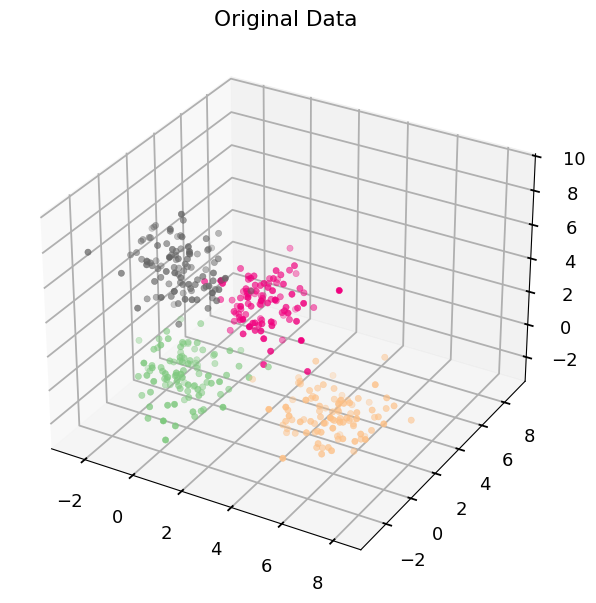

In [39]:
# Plot
do_plot(X.values, 'Original Data', labels=y)

In [40]:
X.values[:,0:-1].shape

(400, 2)

##Dumb 2D projection

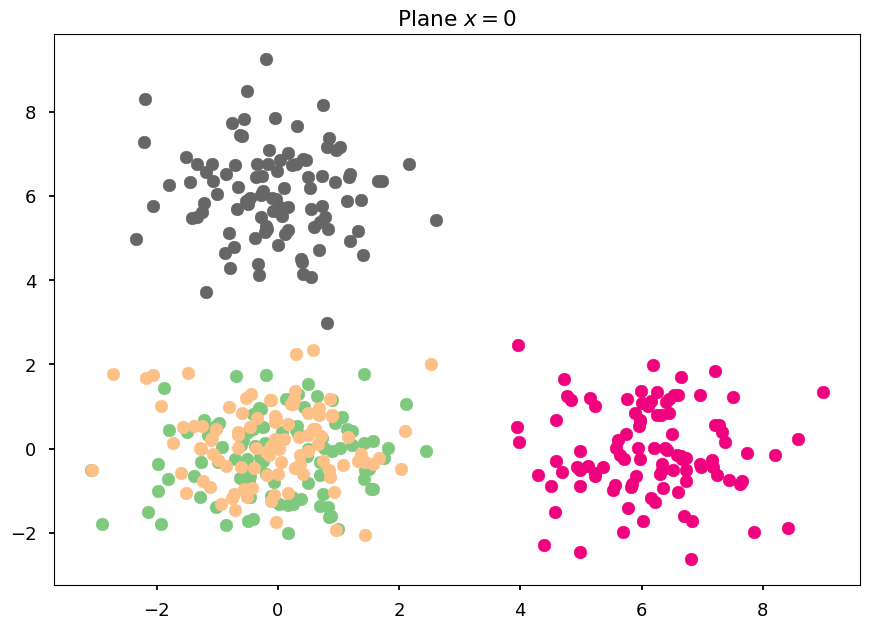

In [43]:
do_plot(X.values[:,1:], 'Plane $x=0$', labels=y)

##PCA (2D)

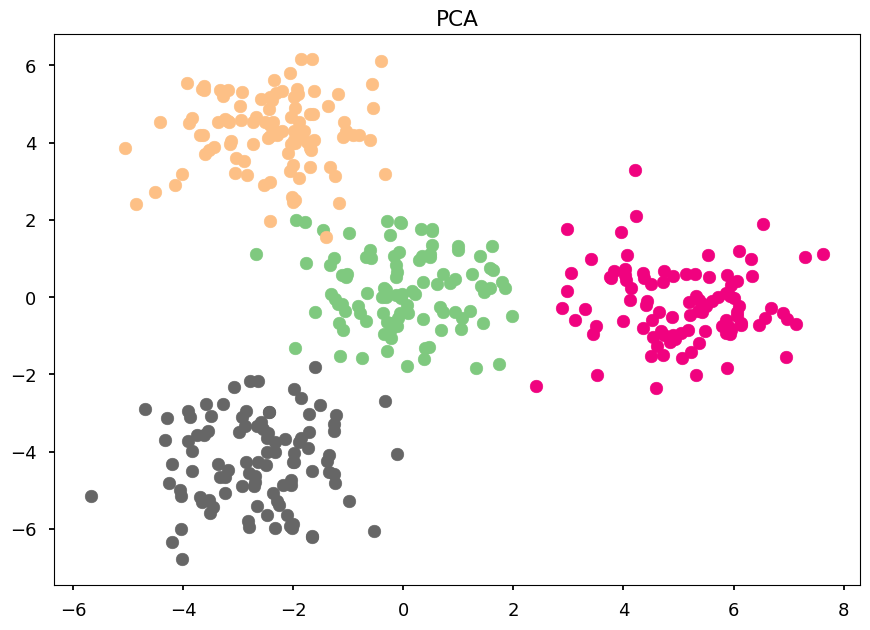

In [44]:
do_plot(PCA(n_components=2).fit_transform(X), 'PCA',labels=y)

#Isomap

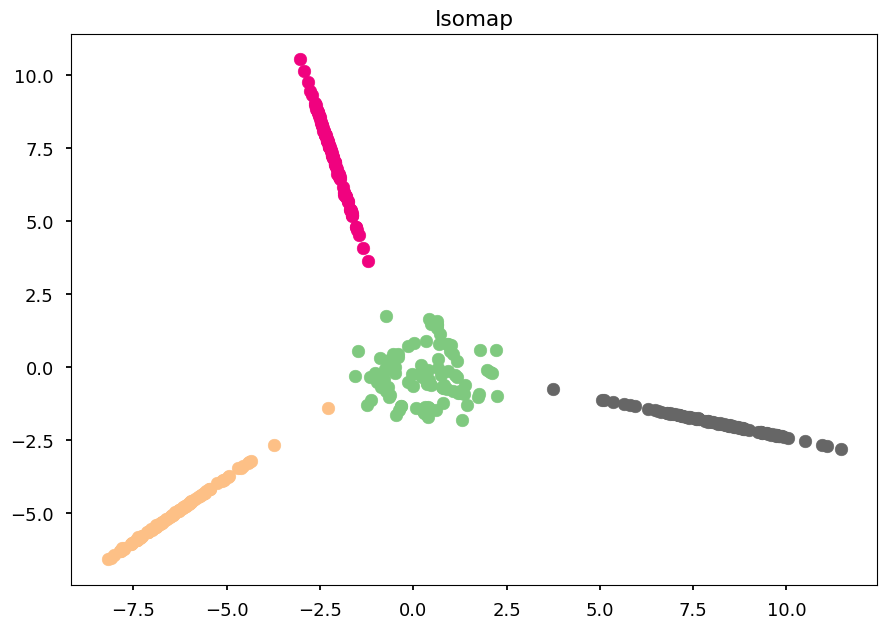

In [47]:
do_plot(Isomap(n_components=2).fit_transform(X), 'Isomap',labels=y)

##Locally Linear Embedding

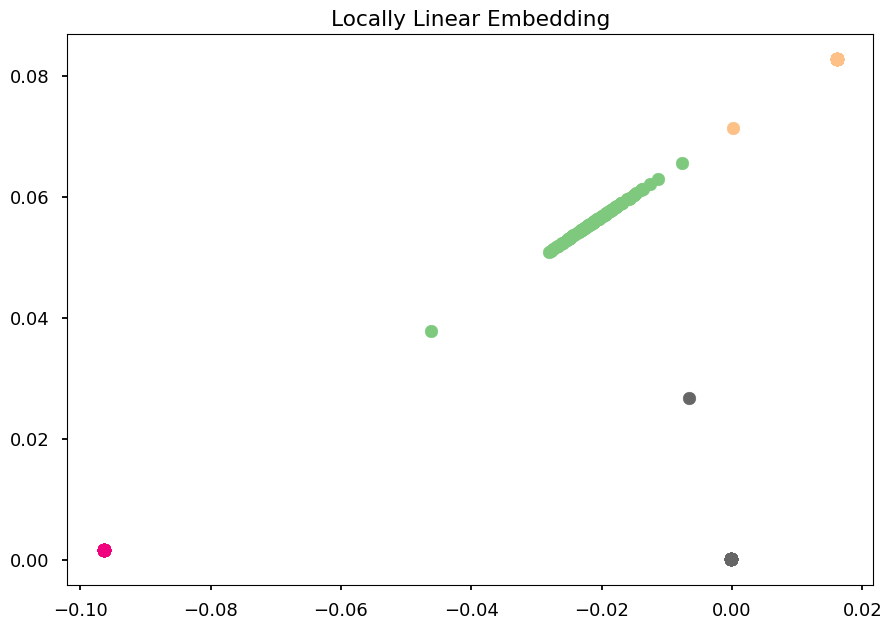

In [48]:
do_plot(LocallyLinearEmbedding(n_components=2).fit_transform(X), 'Locally Linear Embedding',labels=y)

##Spectral Embedding

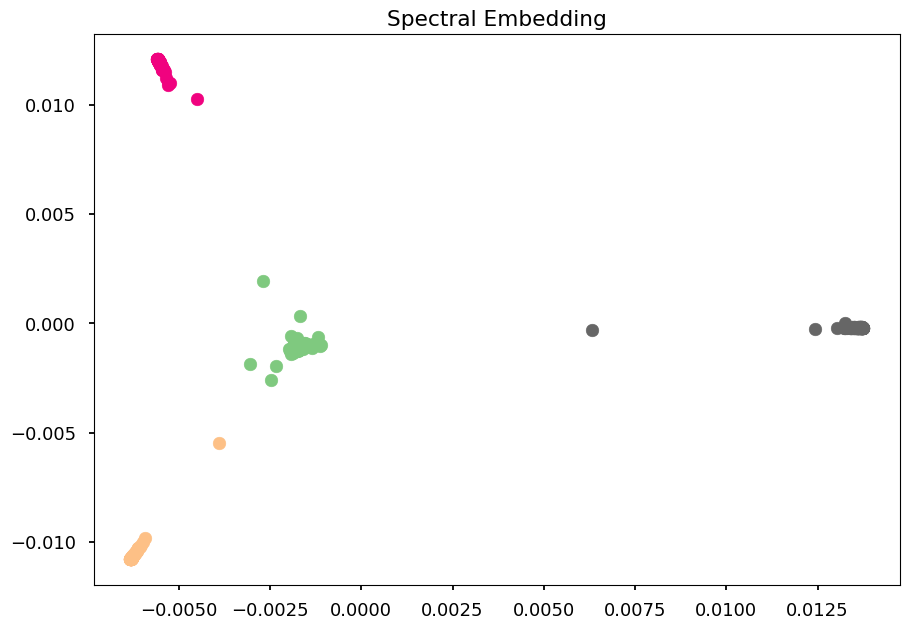

In [49]:
do_plot(SpectralEmbedding(n_components=2).fit_transform(X), 'Spectral Embedding',labels=y)

##Multi-dimensional scaling (MDS)

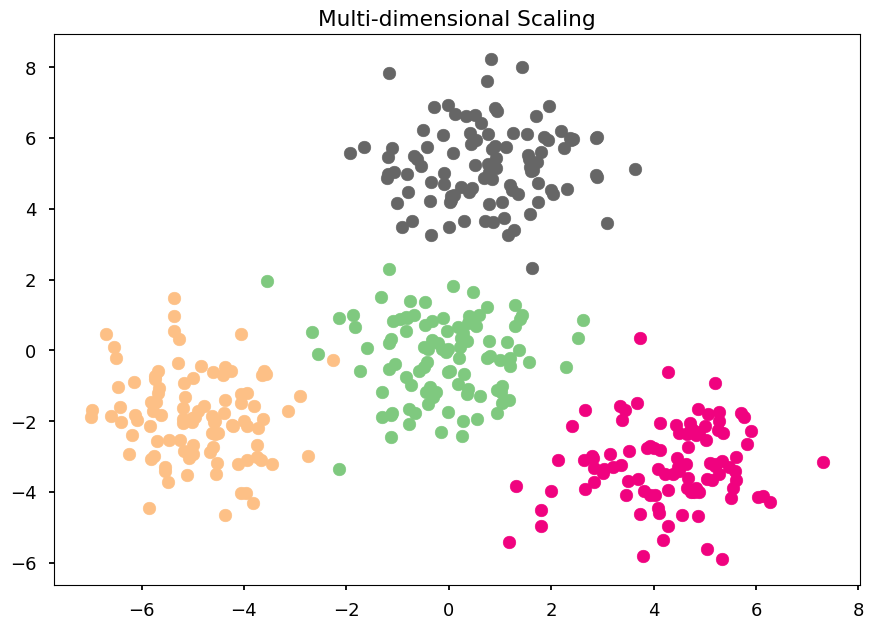

In [50]:
do_plot(MDS(n_components=2).fit_transform(X), 'Multi-dimensional Scaling',labels=y)

##t-SNE (2D)

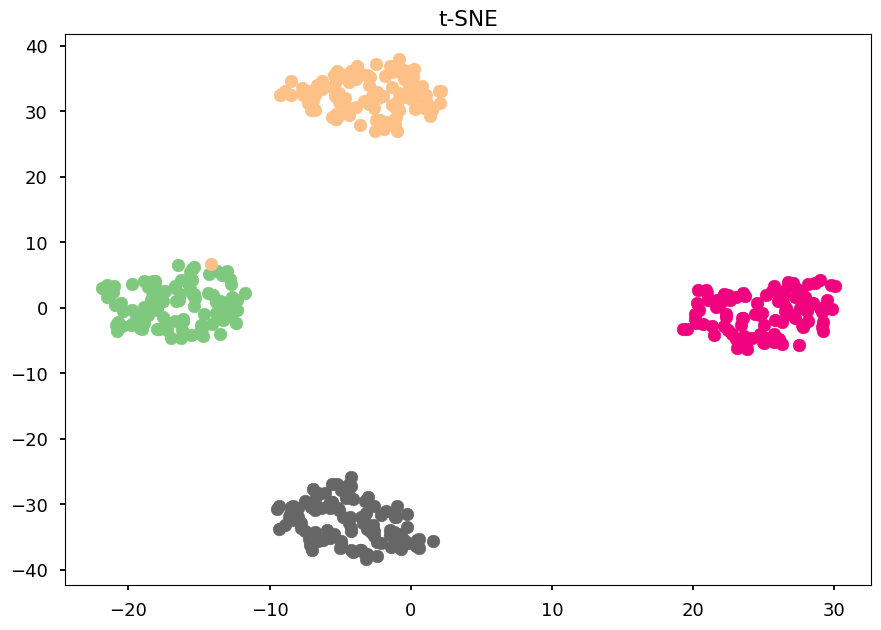

In [52]:
tsne2 = TSNE(n_components=2, random_state=0)
do_plot(tsne2.fit_transform(X), 't-SNE',labels=y)

##PCA (3D)

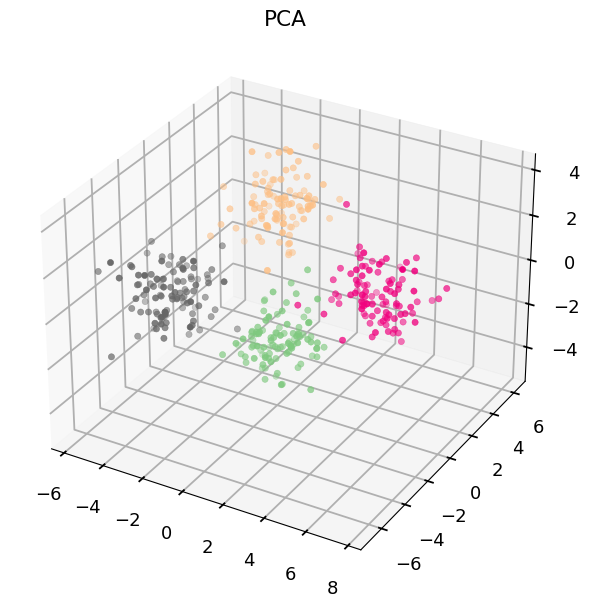

In [53]:
do_plot(PCA(n_components=3).fit_transform(X), 'PCA',labels=y)

##t-SNE (3D)

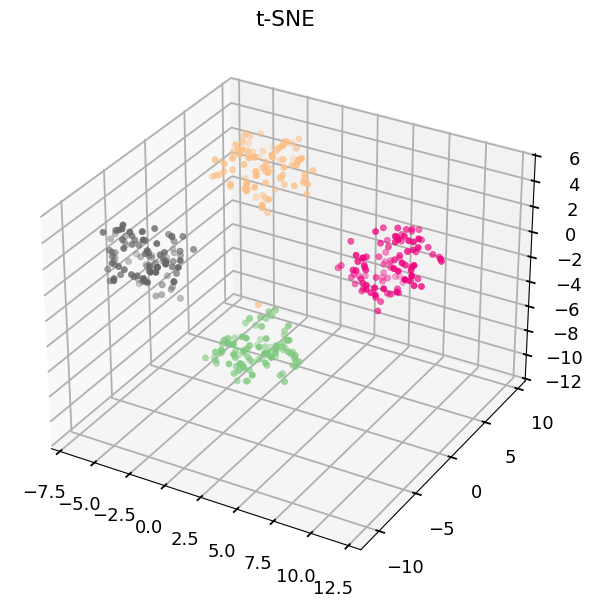

In [55]:
tsne3 = TSNE(n_components=3, learning_rate=10, random_state=0)
do_plot(tsne3.fit_transform(X), 't-SNE',labels=y)

##HDBScan

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Number of clusters: 4


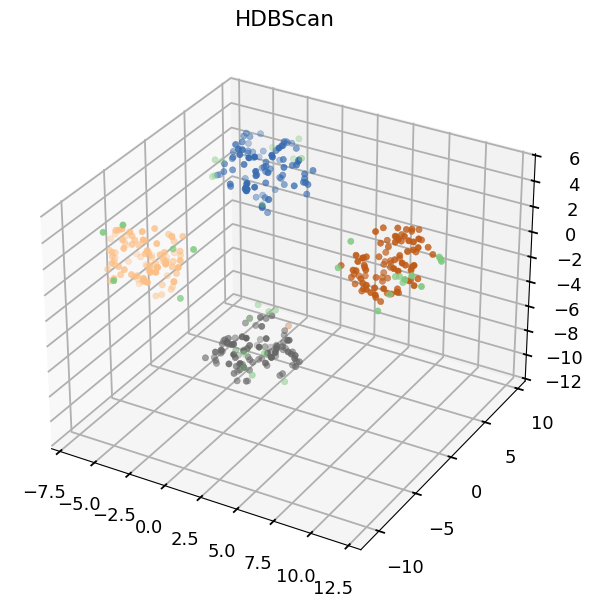

In [56]:
if hdbscan_available:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
    cluster_labels = clusterer.fit_predict(X_std) + 1
    print('Number of clusters: {}'.format(max(cluster_labels)))
    do_plot(tsne3.fit_transform(X), 'HDBScan', labels=cluster_labels)